Practical example

Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

Loading the raw data 

In [3]:
raw_data =pd.read_csv('data.csv')
raw_data

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[4345 rows x 9 columns]

preprocessing 

Exploring the descriptive statistics of the variables 

In [4]:
raw_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [5]:
data=raw_data.drop(['Model'],axis=1)
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

Dealing with missing values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv=data.dropna(axis=0) #no_mv=no missing values

In [8]:
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

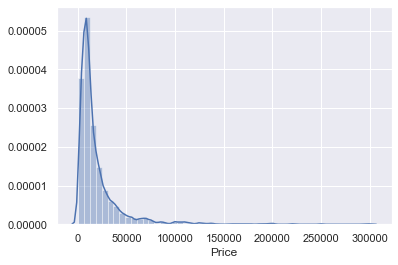

In [9]:
sns.distplot(data_no_mv['Price'])

Dealing with outliers

In [10]:
q=data_no_mv['Price'].quantile(0.99)
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

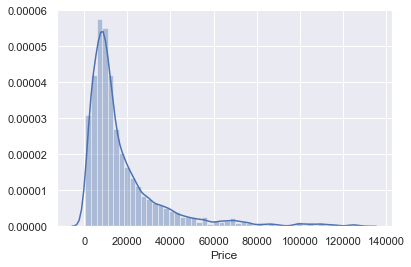

In [11]:
sns.distplot(data_1['Price'])

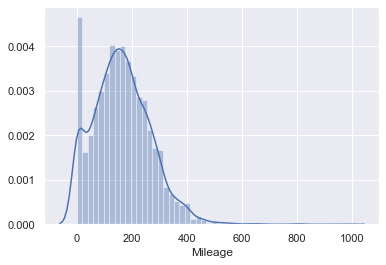

In [12]:
sns.distplot(data_no_mv['Mileage'])

In [13]:
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]

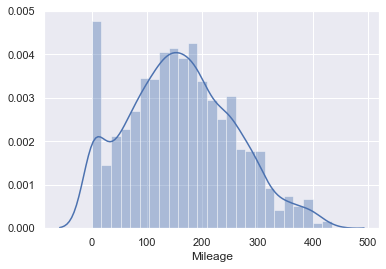

In [14]:
sns.distplot(data_2['Mileage'])

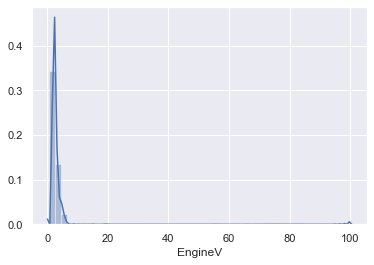

In [15]:
sns.distplot(data_2['EngineV'])

In [16]:
data_3=data_2[data_2['EngineV']<6.5]

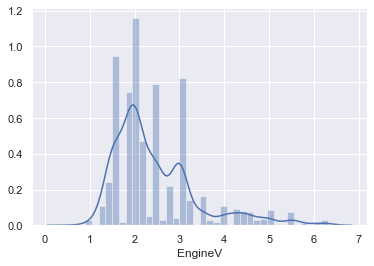

In [17]:
sns.distplot(data_3['EngineV'])

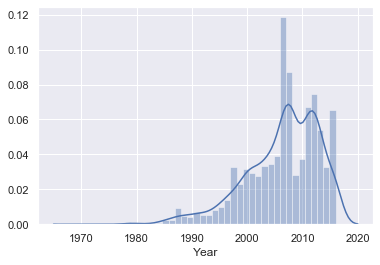

In [18]:
sns.distplot(data_no_mv['Year'])

In [19]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]

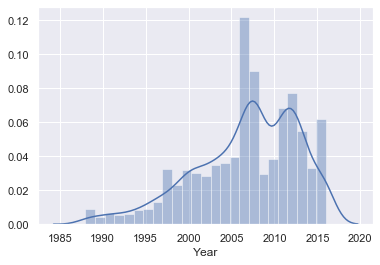

In [20]:
sns.distplot(data_4['Year'])

In [21]:
data_cleaned=data_4.reset_index(drop=True)

In [22]:
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

Chucking the OLS assumption

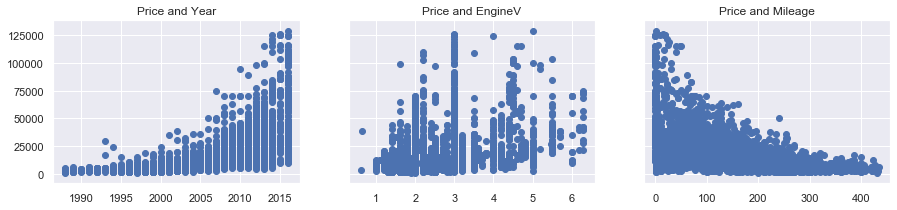

In [23]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

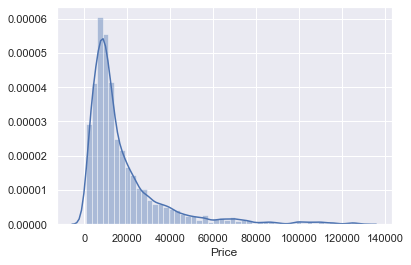

In [24]:
sns.distplot(data_cleaned['Price'])

In [25]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price

In [26]:
data_cleaned


Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  log_price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3862          yes  2008   9.350102  
3863          yes  2014   9.792556  
3864          yes  2014  11.736069  
3865          yes  1999   8.779557  
3866          yes  2013   9.510445  

[3867 rows x 9 columns]

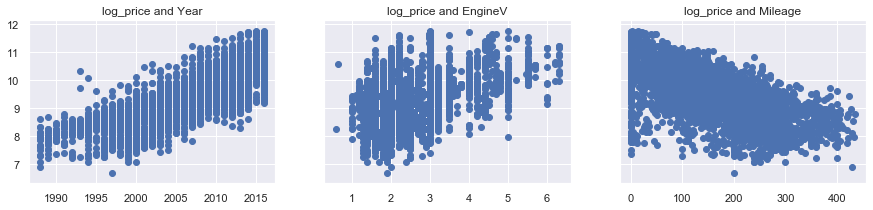

In [27]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')
plt.show()

In [28]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

Multicollinearity

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns

In [31]:
vif

VIF features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

In [32]:
data_no_mc=data_cleaned.drop(['Year'],axis=1) #data_mc=data_no_multicollinearity

Create Dummy variables 

In [33]:
data_with_dummies=pd.get_dummies(data_no_mc,drop_first=True)

In [34]:
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_with_dummies
vif2=pd.DataFrame()
vif2["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif2["features"]=variables.columns

In [36]:
vif2


VIF             features
0    4.460434              Mileage
1   13.445639              EngineV
2   41.981260            log_price
3    2.603990            Brand_BMW
4    3.084356  Brand_Mercedes-Benz
5    1.830297     Brand_Mitsubishi
6    2.281498        Brand_Renault
7    2.406546         Brand_Toyota
8    3.312814     Brand_Volkswagen
9    1.583516           Body_hatch
10   1.597487           Body_other
11   3.455354           Body_sedan
12   1.810633           Body_vagon
13   2.579105             Body_van
14   1.711589      Engine Type_Gas
15   1.082223    Engine Type_Other
16   2.506715   Engine Type_Petrol
17  15.167906     Registration_yes

###Rearrange a bit 

In [37]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [38]:
cols=['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [39]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

Linear regression model 

Declare the inputs and targets 

In [40]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

scale data

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
inputs_scaled=scaler.transform(inputs)

Train test split 

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)


Create the regression

In [44]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred=reg.predict(x_train)

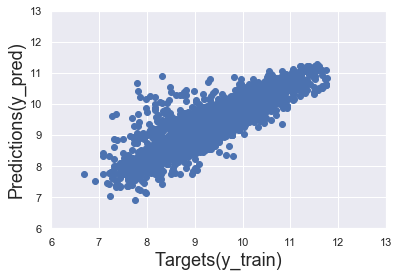

In [46]:
plt.scatter(y_train,y_pred)
plt.xlabel('Targets(y_train)',size=18)
plt.ylabel('Predictions(y_pred)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

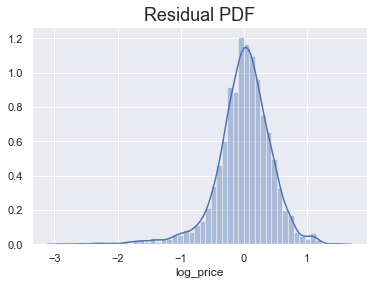

In [47]:
sns.distplot(y_train-y_pred)
plt.title("Residual PDF",size=18)

R-Sqaured

In [48]:
reg.score(x_train,y_train)

0.744996578792662

The weights and bias

bias

In [49]:
reg.intercept_

9.415239458021299

weights

In [50]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [51]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])


In [52]:
reg_summary

Features
0               Mileage
1               EngineV
2             Brand_BMW
3   Brand_Mercedes-Benz
4      Brand_Mitsubishi
5         Brand_Renault
6          Brand_Toyota
7      Brand_Volkswagen
8            Body_hatch
9            Body_other
10           Body_sedan
11           Body_vagon
12             Body_van
13      Engine Type_Gas
14    Engine Type_Other
15   Engine Type_Petrol
16     Registration_yes

In [53]:
reg_summary['weights']=reg.coef_
reg_summary

Features   weights
0               Mileage -0.448713
1               EngineV  0.209035
2             Brand_BMW  0.014250
3   Brand_Mercedes-Benz  0.012882
4      Brand_Mitsubishi -0.140552
5         Brand_Renault -0.179909
6          Brand_Toyota -0.060550
7      Brand_Volkswagen -0.089924
8            Body_hatch -0.145469
9            Body_other -0.101444
10           Body_sedan -0.200630
11           Body_vagon -0.129887
12             Body_van -0.168597
13      Engine Type_Gas -0.121490
14    Engine Type_Other -0.033368
15   Engine Type_Petrol -0.146909
16     Registration_yes  0.320473

In [54]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Dummy Variables Interpretation 

In [55]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [56]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

What are the reference (benchmark) categories for each categorical variable?


Brand -> audi 
Body -> crossover 
Engine Type -> Diesel

Testing

In [57]:
y_pred_test=reg.predict(x_test)

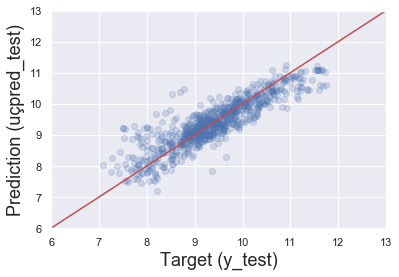

In [58]:
plt.scatter(y_test,y_pred_test,alpha=0.2)
plt.xlabel('Target (y_test)',size=18)
plt.ylabel('Prediction (uçpred_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
x = np.linspace(0,15,100)
y = x
plt.plot(x, y, '-r', label='y=x')
plt.show()

In [59]:
df_pf=pd.DataFrame(np.exp(y_pred_test),columns=['Prediction'])    #df_pf:dataFrame_Performance
df_pf.head()
                                        

Prediction
0  10685.501696
1   3499.255242
2   7553.285218
3   7463.963017
4  11353.490075

In [60]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

Prediction  Target
0  10685.501696     NaN
1   3499.255242  7900.0
2   7553.285218     NaN
3   7463.963017     NaN
4  11353.490075     NaN

Unfortunately we had some missing values

In [61]:
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: log_price, Length: 774, dtype: float64

Pandas tried to match indices 

In [62]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [63]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

Prediction  Target
0  10685.501696  2300.0
1   3499.255242  2800.0
2   7553.285218  2500.0
3   7463.963017  6400.0
4  11353.490075  9150.0

In [64]:
df_pf['Residual']=df_pf['Target']- df_pf['Prediction']

In [67]:
### Here, we take the absolute difference in %, so we can easily order the data frame

df_pf['Differences%']=np.absolute(df_pf['Residual']/df_pf['Target']*100) #np.absolute:I need to display Whether an observation is off by 1% or -1% is mostly irrelevant

In [ ]:
df_pf.describe()

In [ ]:
df_pf.sort_values(by=['Differences%'])

In [ ]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x:'%.2f' % x)
df_pf.sort_values(by=['Differences%'])